**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [95]:
%matplotlib inline
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
#plt.rcParams['figure.dpi']= 300  #resolution

from collections import defaultdict

In [96]:
def draw_list(ts_list, attribute, ts_number=1000, time = None , formatter = None):
    if ts_number >= len(ts_list): ts_number = len(ts_list)-1
    fig = plt.figure()
    ax = fig.subplots()
    for ts in ts_list[:ts_number]:
        if time == None: index = list(ts.index.values)
        else: index= ts[time]
        ax.plot(index, ts[attribute])
    ax.set_ylabel(attribute)
    if formatter !=None:
        date_form = DateFormatter(formatter)
        ax.xaxis.set_major_formatter(date_form)
    plt.show()

# Data Preparation

In [97]:
time_col = 'date'

attributes = ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


df=pd.read_csv(r'../../data/datatraining.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())

mon1=df[df['Weekday']==0][attributes].copy()
tue1=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed1=df[df['Weekday']==2][attributes].copy() #incompleted too
thu1=df[df['Weekday']==3][attributes].copy()
fri1=df[df['Weekday']==4][attributes].copy()
sat1=df[df['Weekday']==5][attributes].copy()
sun1=df[df['Weekday']==6][attributes].copy()
    
weekdays1 = [thu1,fri1,sat1,sun1,mon1] #I dont want incompleted days, so wednesday and tuesday are excluded



df=pd.read_csv(r'../../data/datatest2.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())
                                 
mon2=df[df['Weekday']==0][attributes].copy()
tue2=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed2=df[df['Weekday']==2][attributes].copy() #incompleted too
thu2=df[df['Weekday']==3][attributes].copy()
fri2=df[df['Weekday']==4][attributes].copy()
sat2=df[df['Weekday']==5][attributes].copy()
sun2=df[df['Weekday']==6][attributes].copy()
    
weekdays2 = [thu2,fri2,sat2,sun2,mon2] #I dont want incompleted days, so wednesday and tuesday are excluded


## week list

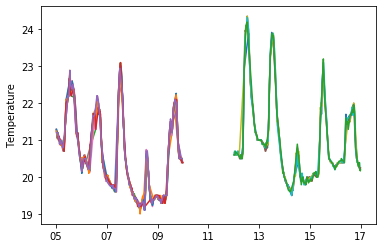

In [107]:
week_size = 144
week_list = []

week1 = pd.DataFrame()
for day in weekdays1:
    day.sort_values(time_col, inplace=True)#first of all: order
    week1 = week1.append(day, ignore_index=True )    ##a week

week1_list = []
tmp = week1.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week1_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
week2 = pd.DataFrame()
for day in weekdays2:    
    day.sort_values(time_col, inplace=True)#first of all: order
    week2 = week2.append(day, ignore_index=True)    ##a week
    
week2_list = []
tmp = week2.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week2_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
random.shuffle(week_list)
draw_list(week_list, 'Temperature', 15, time = time_col ,formatter = '%d')

## day_list

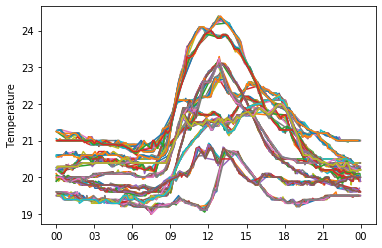

In [108]:
day_list = []
day_size = 120

day1_list=[]
for day in weekdays1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day1_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extra


day2_list = []
for day in weekdays2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day2_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extract


draw_list(day_list, 'Temperature', time = 'time', formatter = '%H')

## day_split

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


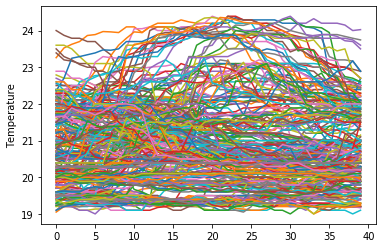

In [109]:
splits = 3 #night #morning #afternoon #evening 
part_size = day_size // splits
day_split = []

day1_split = []
for ts in day1_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day1_split.append(day_part)
    
day2_split = []
for ts in day2_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day2_split.append(day_part)

for day in day1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day2_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_split:
    day.reset_index(drop=True, inplace=True)    


    
draw_list(day_split, 'Temperature')



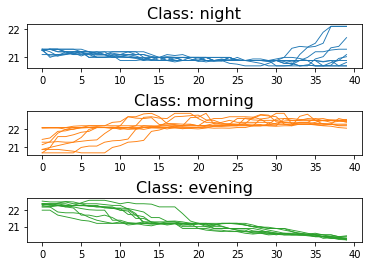

In [110]:
from sklearn import preprocessing

ts_list = []
for temp in day_split:
    ts = temp['Temperature'].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
X = np.array(ts_array)

def daypart(ts): 
     if ts['date'][ts.index[ts_size//2]].hour < 8 : return 'night'
     elif ts['date'][ts.index[ts_size//2]].hour < 16 : return 'morning'
     else: return 'evening'

labels = np.array([daypart(ts) for ts in day_split])

y = preprocessing.LabelEncoder().fit_transform(labels)
plt.figure()
for i, classe in enumerate(['night','morning', 'evening']):
    plt.subplot(3, 1, i + 1)
    for x in X[labels == classe][:10]:
        plt.plot(x, color='C'+str(i), linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

#plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.show()


ts_list = []
for temp in day_split:
    ts = temp['Temperature'].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
X = np.array(ts_array)

def daypart(ts): 
     if ts['date'][ts.index[ts_size//2]].hour < 12 : return 'morning'
     elif ts['date'][ts.index[ts_size//2]].hour < 23 : return 'evening'
    # elif ts['date'][ts.index[ts_size//2]].hour < 18 : return 'afternoon'
    # else: return 'evening'
y = np.array([daypart(ts) for ts in day_split])


plt.figure()
for i, classe in enumerate(['morning','evening']):
    plt.subplot(2, 1, i + 1)
    for x in X[y == classe]:
        plt.plot(x, color='C'+str(i), linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

#plt.tight_layout()
plt.subplots_adjust(hspace=0.7)
plt.show()


# Data Normalization

In [111]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score 

In [112]:
scaler = TimeSeriesScalerMinMax()
X = scaler.fit_transform(X).reshape(X.shape[0], X.shape[1])

# Data Partitioning

In [113]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Shaplet Classifier

In [125]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 252
ts_sz 40
n_classes 3
shapelet_sizes {4: 4}


In [126]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [127]:
shp_clf.fit(X_train, y_train)

Epoch 1/200
252/252 [==============================] - 0s 32us/step - loss: 1.1397 - categorical_accuracy: 0.2659 - categorical_crossentropy: 1.0932
Epoch 2/200
252/252 [==============================] - 0s 56us/step - loss: 1.1397 - categorical_accuracy: 0.2659 - categorical_crossentropy: 1.0932
Epoch 3/200
252/252 [==============================] - 0s 183us/step - loss: 1.1397 - categorical_accuracy: 0.2659 - categorical_crossentropy: 1.0932
Epoch 4/200
252/252 [==============================] - 0s 44us/step - loss: 1.1397 - categorical_accuracy: 0.2619 - categorical_crossentropy: 1.0932
Epoch 5/200
252/252 [==============================] - 0s 32us/step - loss: 1.1396 - categorical_accuracy: 0.2619 - categorical_crossentropy: 1.0932
Epoch 6/200
252/252 [==============================] - 0s 48us/step - loss: 1.1396 - categorical_accuracy: 0.2659 - categorical_crossentropy: 1.0932
Epoch 7/200
252/252 [==============================] - 0s 52us/step - loss: 1.1396 - categorical_accuracy

ShapeletModel(batch_size=256, max_iter=200, n_shapelets_per_size={4: 4},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

In [128]:
y_pred = shp_clf.predict(X_test)

108/108 [==============================] - 0s 93us/step


In [129]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4537037037037037
F1-score [0.57943925 0.         0.50704225]
              precision    recall  f1-score   support

           0       0.44      0.86      0.58        36
           1       0.00      0.00      0.00        36
           2       0.51      0.50      0.51        36

    accuracy                           0.45       108
   macro avg       0.32      0.45      0.36       108
weighted avg       0.32      0.45      0.36       108



# Shaplet-distances-based Classifier

In [130]:
X_train2 = shp_clf.transform(X_train)

252/252 [==============================] - 0s 12us/step


In [131]:
X_train2.shape

(252, 4)

In [132]:
X_train2

array([[0.00087588, 0.00070113, 0.001145  , 0.00042073],
       [0.00087588, 0.00070113, 0.001145  , 0.00042073],
       [0.0023167 , 0.00084961, 0.00342964, 0.00184113],
       ...,
       [0.00087588, 0.00070113, 0.001145  , 0.00042073],
       [0.03937799, 0.03226253, 0.04052334, 0.03483314],
       [0.00174891, 0.00049   , 0.00249896, 0.00156802]], dtype=float32)

In [133]:
X_test2 = shp_clf.transform(X_test)

108/108 [==============================] - 0s 46us/step


In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train2, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [136]:
y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5648148148148148
F1-score [0.56       0.51515152 0.61333333]
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        36
           1       0.57      0.47      0.52        36
           2       0.59      0.64      0.61        36

    accuracy                           0.56       108
   macro avg       0.56      0.56      0.56       108
weighted avg       0.56      0.56      0.56       108



In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5370370370370371
F1-score [0.54545455 0.47761194 0.57831325]
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        36
           1       0.52      0.44      0.48        36
           2       0.51      0.67      0.58        36

    accuracy                           0.54       108
   macro avg       0.54      0.54      0.53       108
weighted avg       0.54      0.54      0.53       108



# Feature-based Classifier

In [139]:
import scipy.stats as stats

In [140]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [141]:
X_train3 = np.array([list(calculate_features(x).values()) for x in X_train])

In [142]:
X_train3.shape

(252, 13)

In [143]:
X_train3

array([[ 0.21116667,  0.2110997 ,  0.04456308, ...,  1.00031723,
         1.9074237 ,  4.28619804],
       [ 0.36937984,  0.33437416,  0.11180608, ...,  1.10469015,
         0.60913944, -1.03806267],
       [ 0.37765377,  0.28451729,  0.08095009, ...,  1.32734911,
         0.59343387, -0.53572424],
       ...,
       [ 0.43857527,  0.28504991,  0.08125345, ...,  1.53859116,
        -0.11239812, -1.22080015],
       [ 0.61840449,  0.25241091,  0.06371127, ...,  2.44999108,
        -0.43756483, -0.78965799],
       [ 0.45008645,  0.25692962,  0.06601283, ...,  1.75178886,
         0.16493665, -0.71882434]])

In [144]:
X_test3 = np.array([list(calculate_features(x).values()) for x in X_test])

In [145]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train3, y_train)

y_pred = clf.predict(X_test3)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7129629629629629
F1-score [0.73239437 0.66666667 0.73684211]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        36
           1       0.70      0.64      0.67        36
           2       0.70      0.78      0.74        36

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108



# Time Series Classifier

In [146]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7962962962962963
F1-score [0.81012658 0.89473684 0.6557377 ]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        36
           1       0.85      0.94      0.89        36
           2       0.80      0.56      0.66        36

    accuracy                           0.80       108
   macro avg       0.80      0.80      0.79       108
weighted avg       0.80      0.80      0.79       108



In [147]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7685185185185185
F1-score [0.74285714 0.84507042 0.72      ]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        36
           1       0.86      0.83      0.85        36
           2       0.69      0.75      0.72        36

    accuracy                           0.77       108
   macro avg       0.77      0.77      0.77       108
weighted avg       0.77      0.77      0.77       108



In [148]:
from pyts.classification import KNeighborsClassifier

In [149]:
clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9444444444444444
F1-score [0.94736842 0.97297297 0.90909091]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       0.95      1.00      0.97        36
           2       1.00      0.83      0.91        36

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



# CNN Classifier

In [150]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

In [151]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [152]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  40
N. LABELS:  3


In [153]:
cnn = build_simple_cnn(n_timesteps, n_outputs)

In [154]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 33, 16)            144       
_________________________________________________________________
batch_normalization_4 (Batch (None, 33, 16)            64        
_________________________________________________________________
activation_4 (Activation)    (None, 33, 16)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 33, 16)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 29, 32)            2592      
_________________________________________________________________
batch_normalization_5 (Batch (None, 29, 32)            128       
_________________________________________________________________
activation_5 (Activation)    (None, 29, 32)           

In [155]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [156]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [157]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/5
 64/201 [========>.....................] - ETA: 0s - loss: 1.1313 - accuracy: 0.1875

C:\Users\carlo\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


201/201 [==============================] - 1s 3ms/step - loss: 1.0637 - accuracy: 0.4229 - val_loss: 1.0871 - val_accuracy: 0.3725
Epoch 2/5
201/201 [==============================] - 1s 5ms/step - loss: 0.9374 - accuracy: 0.6368 - val_loss: 1.0805 - val_accuracy: 0.4314
Epoch 3/5
201/201 [==============================] - 1s 5ms/step - loss: 0.8631 - accuracy: 0.6567 - val_loss: 1.0843 - val_accuracy: 0.5490
Epoch 4/5
201/201 [==============================] - 1s 4ms/step - loss: 0.8101 - accuracy: 0.6866 - val_loss: 1.0890 - val_accuracy: 0.5490
Epoch 5/5
201/201 [==============================] - 1s 4ms/step - loss: 0.7596 - accuracy: 0.7413 - val_loss: 1.0927 - val_accuracy: 0.4510


In [160]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.42592592592592593
F1-score [0.53731343 0.43478261 0.        ]
              precision    recall  f1-score   support

           0       0.37      1.00      0.54        36
           1       1.00      0.28      0.43        36
           2       0.00      0.00      0.00        36

    accuracy                           0.43       108
   macro avg       0.46      0.43      0.32       108
weighted avg       0.46      0.43      0.32       108



In [161]:
cnn.evaluate(X_test_cnn, y_test)

108/108 [==============================] - 0s 2ms/step


[1.093022381817853, 0.42592594027519226]

# LSTM Classifier

In [162]:
from keras.layers import LSTM

In [163]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(256, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [164]:
lstm = build_lstm(n_timesteps, n_outputs)

In [165]:
lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 280,835
Trainable params: 280,835
Non-trainable params: 0
_________________________________________________________________


In [166]:
history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=mini_batch_size, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/10
 48/201 [======>.......................] - ETA: 0s - loss: 0.7125 - accuracy: 0.7083

C:\Users\carlo\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


201/201 [==============================] - 1s 4ms/step - loss: 0.7411 - accuracy: 0.7164 - val_loss: 1.0946 - val_accuracy: 0.3333
Epoch 2/10
201/201 [==============================] - 1s 3ms/step - loss: 0.6858 - accuracy: 0.8308 - val_loss: 1.0933 - val_accuracy: 0.3333
Epoch 3/10
201/201 [==============================] - 1s 3ms/step - loss: 0.6718 - accuracy: 0.7662 - val_loss: 1.0912 - val_accuracy: 0.3333
Epoch 4/10
201/201 [==============================] - 1s 3ms/step - loss: 0.6038 - accuracy: 0.8209 - val_loss: 1.0892 - val_accuracy: 0.3333
Epoch 5/10
201/201 [==============================] - 1s 3ms/step - loss: 0.6194 - accuracy: 0.8308 - val_loss: 1.0890 - val_accuracy: 0.3333
Epoch 6/10
201/201 [==============================] - 1s 3ms/step - loss: 0.5577 - accuracy: 0.8358 - val_loss: 1.0880 - val_accuracy: 0.3333
Epoch 7/10
201/201 [==============================] - 1s 3ms/step - loss: 0.5265 - accuracy: 0.8358 - val_loss: 1.0856 - val_accuracy: 0.3333
Epoch 8/10
201/20

In [167]:
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.39814814814814814
F1-score [0.57943925 0.32876712 0.        ]
              precision    recall  f1-score   support

           0       0.44      0.86      0.58        36
           1       0.32      0.33      0.33        36
           2       0.00      0.00      0.00        36

    accuracy                           0.40       108
   macro avg       0.25      0.40      0.30       108
weighted avg       0.25      0.40      0.30       108



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
lstm.evaluate(X_test_cnn, y_test)

 32/108 [=======>......................] - ETA: 0s

C:\Users\carlo\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


108/108 [==============================] - 1s 8ms/step


[1.0989758570988972, 0.39814814925193787]

# Multivariate Time Series Classifiers

In [174]:
from pyts.datasets import load_basic_motions

from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [179]:
from sklearn import preprocessing

ts_list = []
for temp in day_split:
    ts = temp[['Temperature','Humidity','CO2','Light','HumidityRatio']].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts))
    
X = np.array(ts_array)

X.shape


(360, 40, 5)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)


In [181]:
scaler = TimeSeriesScalerMinMax()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
print(X_train.shape, X_test.shape)

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

(252, 40, 5) (108, 40, 5)
[[ 0  1  2]
 [84 84 84]]
[[ 0  1  2]
 [36 36 36]]


In [185]:
n_timesteps, n_outputs, n_features = X_train.shape[1], len(np.unique(y_train)), X_train.shape[2] 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)
print("N. FEATURES: ", n_features)

TIMESTEPS:  40
N. LABELS:  3
N. FEATURES:  5


In [186]:
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [187]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, Conv2D, MaxPool2D, Flatten, Dropout, LeakyReLU, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [188]:
def build_lstm2(n_timesteps, n_outputs, n_features):
    model = Sequential()
    model.add(LSTM(4, input_shape=(n_timesteps, n_features), return_sequences=True, 
                        kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    
    #1
    for _ in range(2):
        model.add(LSTM(4, kernel_initializer='TruncatedNormal', return_sequences=True))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.04))   

    #2
    model.add(LSTM(32, kernel_initializer='TruncatedNormal', return_sequences=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.7))
    
    #3
    for _ in range(2):
        model.add(Dense(256, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.2))
    #4
    for _ in range(1):
        model.add(Dense(64, kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.7))

    #5
    model.add(Dense(32, kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.4))
        
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [189]:
lstm2 = build_lstm2(n_timesteps, n_outputs, n_features)

In [190]:
lstm2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 40, 4)             160       
_________________________________________________________________
batch_normalization_7 (Batch (None, 40, 4)             16        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 40, 4)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 4)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 40, 4)             144       
_________________________________________________________________
batch_normalization_8 (Batch (None, 40, 4)             16        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 40, 4)            

In [191]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_lstm2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [192]:
history_lstm2 = lstm2.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                          validation_data=(X_val_cnn, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/50
 16/201 [=>............................] - ETA: 1s - loss: nan - accuracy: 0.2500

C:\Users\carlo\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


201/201 [==============================] - 6s 28ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/50
201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/50
201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/50
201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/50
201/201 [==============================] - 2s 11ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/50
201/201 [==============================] - 3s 14ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/50
201/201 [==============================] - 2s 12ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 8/50
201/201 [==============================] 

In [193]:
y_pred = np.argmax(lstm2.predict(X_test), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3333333333333333
F1-score [0.5 0.  0. ]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        36
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        36

    accuracy                           0.33       108
   macro avg       0.11      0.33      0.17       108
weighted avg       0.11      0.33      0.17       108



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [194]:
X_train_cnn.shape

(201, 40, 5)

In [195]:
X_train_cnn2 = X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1], X_train_cnn.shape[2], 1)
X_val_cnn2 = X_val_cnn.reshape(X_val_cnn.shape[0], X_val_cnn.shape[1], X_val_cnn.shape[2], 1)
X_test_cnn2 = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

X_train_cnn2.shape

(201, 40, 5, 1)

In [196]:
def build_cnn2(n_timesteps, n_features, n_outputs):
    input_shape = (n_timesteps, n_features, 1)

    model = Sequential()
    
    ks1_first = 3
    ks1_second = 3
    
    ks2_first = 4
    ks2_second = 4
    
    model.add(Conv2D(filters=(3), 
                     kernel_size=(ks1_first, ks1_second),
                     input_shape=input_shape, 
                     padding='same',
                     kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.02))
    
    for _ in range(2):
        model.add(Conv2D(filters=(4), 
                     kernel_size= (ks2_first, ks2_second), 
                         padding='same',
                     kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.2))  
    
    model.add(Flatten())
    
    for _ in range(4):
        model.add(Dense(64 , kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.4))
    
    for _ in range(3):
        model.add(Dense(128 , kernel_initializer='TruncatedNormal'))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(0.3))
  
    model.add(Dense(1024 , kernel_initializer='TruncatedNormal'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.7))
        
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [197]:
cnn2 = build_cnn2(n_timesteps, n_features, n_outputs)

In [198]:
cnn2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 5, 3)          30        
_________________________________________________________________
batch_normalization_15 (Batc (None, 40, 5, 3)          12        
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 40, 5, 3)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 40, 5, 3)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 5, 4)          196       
_________________________________________________________________
batch_normalization_16 (Batc (None, 40, 5, 4)          16        
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 40, 5, 4)         

In [199]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [200]:
history_cnn2 = cnn2.fit(X_train_cnn2, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn2, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/50
 32/201 [===>..........................] - ETA: 0s - loss: nan - accuracy: 0.2812

C:\Users\carlo\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


201/201 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/50
201/201 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/50
201/201 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/50
201/201 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/50
201/201 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/50
201/201 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/50
201/201 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 8/50
201/201 [==============================] - 1s 6

In [201]:
y_pred = np.argmax(cnn2.predict(X_test_cnn2), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3333333333333333
F1-score [0.5 0.  0. ]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        36
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        36

    accuracy                           0.33       108
   macro avg       0.11      0.33      0.17       108
weighted avg       0.11      0.33      0.17       108



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
def build_cnn3(n_timesteps, n_outputs, n_features):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [203]:
cnn3 = build_cnn3(n_timesteps, n_outputs, n_features)

In [204]:
cnn3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 33, 16)            656       
_________________________________________________________________
batch_normalization_26 (Batc (None, 33, 16)            64        
_________________________________________________________________
activation_7 (Activation)    (None, 33, 16)            0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 33, 16)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 29, 32)            2592      
_________________________________________________________________
batch_normalization_27 (Batc (None, 29, 32)            128       
_________________________________________________________________
activation_8 (Activation)    (None, 29, 32)           

In [205]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn2.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train.shape[0]/10, batch_size))

In [206]:
history_cnn3 = cnn3.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Train on 201 samples, validate on 51 samples
Epoch 1/50
 48/201 [======>.......................] - ETA: 0s - loss: nan - accuracy: 0.2500

C:\Users\carlo\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


201/201 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/50
201/201 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/50
201/201 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/50
201/201 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/50
201/201 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/50
201/201 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/50
201/201 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 8/50
201/201 [==============================] - 1s 3m

In [207]:
y_pred = np.argmax(cnn3.predict(X_test), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3333333333333333
F1-score [0.5 0.  0. ]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        36
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        36

    accuracy                           0.33       108
   macro avg       0.11      0.33      0.17       108
weighted avg       0.11      0.33      0.17       108



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

https://pyts.readthedocs.io/en/stable/generated/pyts.multivariate.classification.MultivariateClassifier.html#pyts.multivariate.classification.MultivariateClassifier